# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Merge / Transform

In [2]:
# 生成範例用的資料 ()
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [3]:
df1.head()

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [4]:
# 沿縱軸合併
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [5]:
# 沿橫軸合併
result = pd.concat([df1, df4], axis = 1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [6]:
# 沿橫軸合併
result = pd.concat([df1, df4], axis = 1, join = 'inner') # 硬串接
print(result)

result = pd.merge(df1, df4, how='inner')
print(result)

    A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3
    A   B   C   D   F
0  A2  B2  C2  D2  F2
1  A3  B3  C3  D3  F3


In [7]:
# 將 欄-列 逐一解開
print(df1)
df1.melt()

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3


,variable,value
0,A,A0
1,A,A1
2,A,A2
3,A,A3
4,B,B0
5,B,B1
6,B,B2
7,B,B3
8,C,C0
9,C,C1


## Subset

In [8]:
# 設定 data_path
dir_data = '../../data/Part01'

In [9]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../../data/Part01\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 取 TARGET 為 1 的
sub_df = app_train[app_train['TARGET'] == 1]
sub_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# 取 AMT_INCOME_TOTAL 大於平均資料中，SK_ID_CURR, TARGET 兩欄
sub_df = app_train.loc[app_train['AMT_INCOME_TOTAL'] > app_train['AMT_INCOME_TOTAL'].mean(), ['SK_ID_CURR', 'TARGET']]
sub_df.head()

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
6,100009,0
7,100010,0
13,100017,0


## Groupby

In [12]:
app_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [11]:
app_train.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

In [18]:
app_train.groupby(['NAME_CONTRACT_TYPE']).groups

{'Cash loans': Int64Index([     0,      1,      3,      4,      5,      6,      7,      8,
                 10,     11,
             ...
             307501, 307502, 307503, 307504, 307505, 307506, 307507, 307508,
             307509, 307510],
            dtype='int64', length=278232),
 'Revolving loans': Int64Index([     2,      9,     17,     18,     20,     29,     39,     45,
                 50,     57,
             ...
             307384, 307385, 307402, 307419, 307425, 307444, 307457, 307467,
             307485, 307496],
            dtype='int64', length=29279)}

In [19]:
app_train.groupby(['NAME_CONTRACT_TYPE']).get_group('Cash loans')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
10,100014,0,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [20]:
app_train.groupby(['NAME_CONTRACT_TYPE']).sum()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,,,,,,
Cash loans,77383375814,23221,114082,4.704055e+10,1.747202e+11,7.858119e+09,1.559667e+11,5772.636287,-4496022132,18449686904,...,2323,177,156,1,1540.0,1731.0,8524.0,65462.0,65331.0,465497.0
Revolving loans,8160193634,1604,14166,4.866668e+09,9.486922e+09,4.777402e+08,9.446332e+09,644.537720,-435530258,1174141677,...,177,6,0,102,163.0,131.0,616.0,5663.0,5283.0,39881.0


In [21]:
app_train.groupby(['NAME_CONTRACT_TYPE'])['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_CONTRACT_TYPE,,,,,,,,
Cash loans,278232.0,169069.513575,245910.950896,25650.0,112500.0,153000.0,202500.0,117000000.0
Revolving loans,29279.0,166217.017656,126028.600660,27000.0,99000.0,135000.0,202500.0,4500000.0


In [22]:
app_train.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean()

NAME_CONTRACT_TYPE
Cash loans         0.083459
Revolving loans    0.054783
Name: TARGET, dtype: float64

In [23]:
app_train.groupby(['NAME_CONTRACT_TYPE', 'TARGET']).mean()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
NAME_CONTRACT_TYPE TARGET                                                  
Cash loans         0       278193.778751      0.405394     169225.742548   
                   1       277374.019250      0.460876     167353.820593   
Revolving loans    0       278714.368238      0.482529     167713.790911   
                   1       278537.090399      0.506234     140392.080112   

                              AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
NAME_CONTRACT_TYPE TARGET                                                 
Cash loans         0       632461.030097  28318.818178    565645.394810   
                   1       578598.766181  27425.554541    504756.544550   
Revolving loans    0       327939.024390  16519.593496    329667.098257   
                   1       256365.336658  12818.266833    257435.249526   

                           REGION_POPULATION_RELATIVE    DAYS_BIRTH  \
NAME_CONTRACT_TYPE TARGET                                             
Cash loans         0                         0.020895 -16267.288517   
                   1                         0.019134 -14972.853021   
Revolving loans    0                         0.022183 -14948.474110   
                   1                         0.019085 -13610.496883   

                           DAYS_EMPLOYED  DAYS_REGISTRATION  ...  \
NAME_CONTRACT_TYPE TARGET                                    ...   
Cash loans         0        68413.705989       -5056.075075  ...   
                   1        43212.580251       -4499.376383  ...   
Revolving loans    0        40655.218970       -4789.129503  ...   
                   1        30553.922693       -4309.793641  ...   

                           FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
NAME_CONTRACT_TYPE TARGET                                       
Cash loans         0               0.008627          0.000655   
                   1               0.005297          0.000431   
Revolving loans    0               0.005709          0.000145   
                   1               0.011845          0.001247   

                           FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
NAME_CONTRACT_TYPE TARGET                                       
Cash loans         0               0.000561          0.000000   
                   1               0.000560          0.000043   
Revolving loans    0               0.000000          0.003216   
                   1               0.000000          0.008105   

                           AMT_REQ_CREDIT_BUREAU_HOUR  \
NAME_CONTRACT_TYPE TARGET                               
Cash loans         0                         0.006367   
                   1                         0.006654   
Revolving loans    0                         0.006497   
                   1                         0.006939   

                           AMT_REQ_CREDIT_BUREAU_DAY  \
NAME_CONTRACT_TYPE TARGET                              
Cash loans         0                        0.007093   
                   1                        0.008214   
Revolving loans    0                        0.005232   
                   1                        0.005397   

                           AMT_REQ_CREDIT_BUREAU_WEEK  \
NAME_CONTRACT_TYPE TARGET                               
Cash loans         0                         0.035359   
                   1                         0.035506   
Revolving loans    0                         0.024555   
                   1                         0.026214   

                           AMT_REQ_CREDIT_BUREAU_MON  \
NAME_CONTRACT_TYPE TARGET                              
Cash loans         0                        0.275116   
                   1                        0.231493   
Revolving loans    0                        0.229348   
                   1                        0.175019   

                           AMT_REQ_CREDIT_BUREAU_QRT  \
NAME_CONTRACT_TYPE TARGET                              
Cash loans         0            

In [25]:
sub_df = app_train.loc[0:10000, ['NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']]
sub_df.groupby(['NAME_CONTRACT_TYPE']).mean()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
NAME_CONTRACT_TYPE,,,
Cash loans,168011.426892,632514.239840,28345.960193
Revolving loans,162415.144221,313349.246231,15694.597990


In [26]:
# 取前 10000 筆作範例: 分別將 AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY 除以根據 NAME_CONTRACT_TYPE 分組後的平均數，
app_train.loc[0:10000, ['NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']].groupby(['NAME_CONTRACT_TYPE']).apply(lambda x: x / x.mean())

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
0,1.205275,0.642827,0.871394
1,1.607034,2.045017,1.259386
2,0.415602,0.430829,0.430084
3,0.803517,0.494349,1.047292
4,0.723165,0.811049,0.771380
5,0.589246,0.775469,0.970773
6,1.017788,2.467495,1.457033
7,2.142711,2.418918,1.484338
8,0.669597,1.611995,1.193345
9,0.831203,1.292488,1.290253


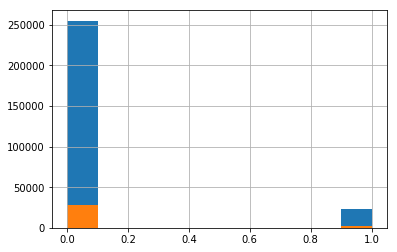

In [27]:
app_train.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].hist()
plt.show()

## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [29]:
app_train['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

# 作業 1
> 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
> * 0 個小孩
> * 有 1 - 2 個小孩
> * 有 3 - 5 個小孩
> * 有超過 5 個小孩

In [64]:
interval = [-1,0,2,5,20]
labels = ['0 child', '1-2','3-5', 'more than 5']
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'], bins = interval, labels = labels)
app_train['CNT_CHILDREN_GROUP'].value_counts()

0 child        215371
1-2             87868
3-5              4230
more than 5        42
Name: CNT_CHILDREN_GROUP, dtype: int64

# 作業 2
>請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot

In [68]:
mean_df = pd.DataFrame(app_train.groupby(['CNT_CHILDREN_GROUP', 'TARGET'])['AMT_INCOME_TOTAL'].mean())
mean_df.head(20)

AMT_INCOME_TOTAL
CNT_CHILDREN_GROUP TARGET                  
0 child            0          166747.010980
                   1          160804.210548
1-2                0          174590.584401
                   1          176115.362720
3-5                0          175053.742913
                   1          160677.385714
more than 5        0          139159.090909
                   1          180000.000000

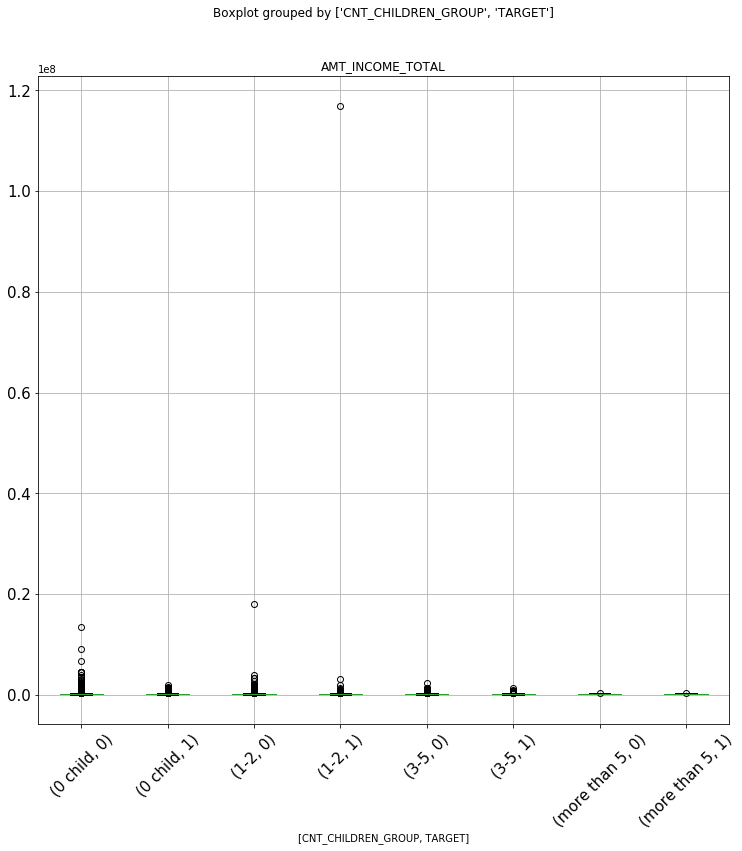

In [72]:
app_train.boxplot(column=['AMT_INCOME_TOTAL'], by=['CNT_CHILDREN_GROUP', 'TARGET'], 
                  rot=45, fontsize=15, figsize=(12,12))

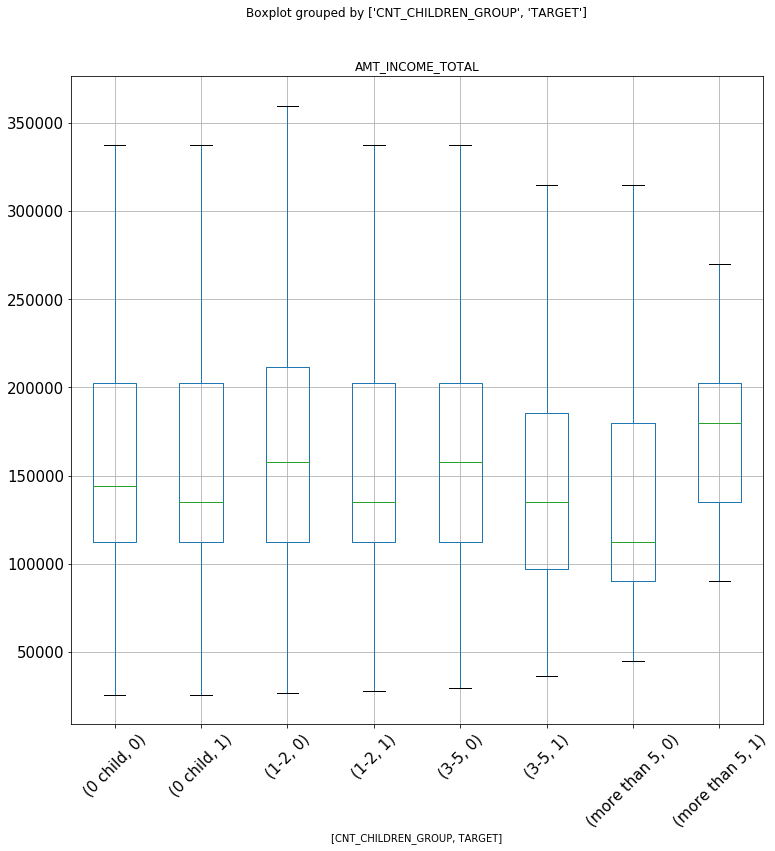

In [74]:
app_train.boxplot(column=['AMT_INCOME_TOTAL'], by=['CNT_CHILDREN_GROUP', 'TARGET'], 
                  rot=45, fontsize=15, figsize=(12,12), showfliers = False)

# 作業 3
> 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數

In [93]:
grouped =  app_train.groupby(['CNT_CHILDREN_GROUP', 'TARGET'])['AMT_INCOME_TOTAL']
app_train['AMT_INCOME_TOTAL_Z_SCORE'] = grouped.apply(lambda x : (x - x.mean()) / x.std())
app_train[['AMT_INCOME_TOTAL', 'AMT_INCOME_TOTAL_Z_SCORE']].head(10)

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_SCORE
0,202500.000000,0.491521
1,270000.000000,0.972434
2,67500.000000,-0.934706
3,135000.000000,-0.298993
4,121500.000000,-0.426135
5,99000.000000,-0.638040
6,171000.000000,-0.029872
7,360000.000000,1.820052
8,112500.000000,-0.510897
9,135000.000000,-0.298993


In [94]:
grouped_mean =  grouped.mean()
grouped_mean

CNT_CHILDREN_GROUP  TARGET
0 child             0        166747.010980
                    1        160804.210548
1-2                 0        174590.584401
                    1        176115.362720
3-5                 0        175053.742913
                    1        160677.385714
more than 5         0        139159.090909
                    1        180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [87]:
pd.set_option('display.float_format', '{:.6f}'.format)
grouped_std = grouped.std()
grouped_std

CNT_CHILDREN_GROUP  TARGET
0 child             0         106179.910365
                    1          84830.105122
1-2                 0         120198.144429
                    1        1327158.661545
3-5                 0         112842.698613
                    1         113031.456320
more than 5         0          71124.830244
                    1          73771.183398
Name: AMT_INCOME_TOTAL, dtype: float64

In [91]:
grouped.get_group(('0 child', 1)).mean()

160804.2105484978

In [92]:
grouped.get_group(('0 child', 1)).std()

84830.10512160917